In [1]:
#11:06 pm
import numpy as np
import matplotlib.pyplot as plt
print("Hello world I'm an AI.")

Hello world I'm an AI.


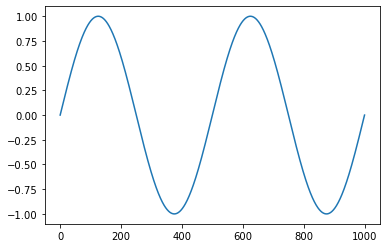

In [2]:
data_pi = np.linspace(-2*np.pi, 2*np.pi , 1000)
data_norm = data_pi/6.28
y_act = np.sin(data_pi)
plt.plot(y_act)

In [87]:
def activation(x):
    return np.tanh(x)

def layer_computation(x,w,b):
    return np.dot(x,w) + b

def loss(x,a):
    return np.square(x - a)*0.5, (x-a)

def init_weights(layer_info):
    weights = []
    for i in layer_info:
        weights.append(np.random.ranf(i))
    return weights

def forward_prop(x,y_act,weights):
    neurons = []
    neurons.append(x)
    i = 0
    for layer in weights:
        layer_sum = layer_computation(neurons[i],weights[i],0)
        activated = activation(layer_sum)
        neurons.append(activated)
        i += 1
    loss_mse, loss_derivative  = loss(neurons[-1],y_act)

    return loss_mse , loss_derivative , neurons



# def Back_Propagation(AL, ZL, y, alpha):
#     for i in reversed(range(len(Weight_Matrix))):
#         if(i == len(Weight_Matrix) - 1):
#             dczL = np.multiply((AL[i+1] - y),(activation_function_derivative(ZL[i])));
#             dCdw = np.dot(dczL , AL[i].transpose());
#             #print(dCdw);
#             Weight_Matrix_Derivative[i] = Weight_Matrix_Derivative[i] + dCdw;
#             Bias_Values_Derivative[i] = Bias_Values_Derivative[i] + dczL;
#         else:
#             dczl = np.multiply(np.dot(Weight_Matrix[i+1].transpose() , dczL) , activation_function_derivative(ZL[i]));
#             dCdw = np.dot(dczl , AL[i].transpose());
#             #print(dCdw);
#             Weight_Matrix_Derivative[i] = Weight_Matrix_Derivative[i] + dCdw;
#             Bias_Values_Derivative[i] = Bias_Values_Derivative[i] + dczl;
#             dczL = dczl;


def backward_prop(loss_derivative,weights,neurons,lr):
    updates = [1,2,3,4]
    network_size = len(weights) 
    for i in reversed(range(0,network_size)):
        if i == network_size-1:
            dA_dL = 1 - (np.tanh(neurons[i+1]))*2
            dczL = np.multiply(loss_derivative,dA_dL);
            dCdw = np.dot(dczL , neurons[i]);
            updates[i] = updates[i] + dCdw;
        
        else:
            dA_dL = 1 - (np.tanh(neurons[i+1]))*2
            dczl = np.multiply(np.dot(weights[i+1].transpose() , dczL) , dA_dL);
            dCdw = np.dot(dczl , neurons[i].transpose());
            updates[i] = updates[i] + dCdw;
            dczL = dczl
            
    print(updates,weights)
    updated_weights = weights - (np.multiply(lr ,updates))
    return updated_weights

def ANN(data,y_act,weights,epochs,lr):
    for epoch in range(epochs):
        loss_epoch = 0
        i = 0
        for inp in data:
            loss_mse , loss_derivative , neurons = forward_prop(inp,y_act[i],weights)
            updated_weights = backward_prop(loss_derivative,weights,neurons,lr)
            weights = updated_weights
            loss_epoch += loss_mse
            i += 1
        print("________________Epoch ",epoch, "Loss:", loss_epoch)
    return weights

def forward_prop_pred(x,weights):
    neurons = []
    neurons.append(x)
    i = 0
    for layer in weights:
        layer_sum = layer_computation(neurons[i],weights[i],0)
        activated = activation(layer_sum)
        neurons.append(activated)
        i += 1
    return neurons[-1]

def predict(val,weights):
    predictions = []
    for inp in val:
        prediction = forward_prop_pred(inp,weights)
        predictions.append(prediction)
    return predictions

In [88]:

layer_info = [[1,2],[2,3],[3,1]]
weights = init_weights(layer_info)
lr = 0.001
epochs = 50
val = data_norm[0:990]
trained_weights = ANN(data_norm,y_act,weights,epochs,lr)
predictions = predict(val,trained_weights)

predictions = [pred[0]*6.28 for pred in predictions]

ValueError: shapes (1,3) and (1,1) not aligned: 3 (dim 1) != 1 (dim 0)

NameError: name 'predictions' is not defined

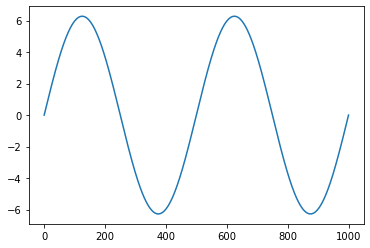

In [5]:
plt.plot(y_act*6.28)
plt.plot(predictions)

In [42]:
weights

[array([[0.34411986, 0.97367321]]),
 array([[0.62980359, 0.37462817, 0.79669458],
        [0.42356166, 0.48038298, 0.04700001]]),
 array([[0.07348424],
        [0.02457057],
        [0.99444891]])]